#    Physics 261: Class 20
## 18 Mar 2024
<hr style="border-top: 1px solid purple; margin-top: 1px; border: 3px solid purple"></hr>
 The goals for today:

    1. Software notes:
        a. New timing package: Chairmarks.jl
        b. Update to Jupyterlab Desktop app.
        
    2. Final Projects Timeline and Info
    3. Wordle
    
<hr style="margin-bottom: 1px; border: 3px solid purple"></hr>


# Software notes:
## Chairmarks.jl
There is a [new timing package](https://github.com/LilithHafner/Chairmarks.jl) called Chairmarks.jl which has some advantages over BenchmarkTools.jl (which is now looking for a new maintainer). 

## jupyterlab-desktop app
The current version of jupyterlab-desktop app is Version 4.1.4-1. If you have an old version, [you should update](https://github.com/jupyterlab/jupyterlab-desktop/releases/tag/v4.1.4-1);
make sure to follow the [directions about uninstalling any old versions](https://github.com/jupyterlab/jupyterlab-desktop/blob/master/user-guide.md#uninstalling-jupyterlab-desktop) first.


# Final Projects
As a reminder, your final project notebook and your final presentation (on finals week) are together worth 200 points
(100 points each) for a total of 20% of your course grade. You need to get started this week!
## Timeline
22 Mar: Project proposal (as .ipynb or .md file) due by 5pm (10 pts/100) </br>
Dropbox link: https://www.dropbox.com/request/bRrbAgbPQ9EjuhB5I5zV</br>

15 Apr: Final Project Check-in (10 pts/100) </br>

29 Apr: Final Project Presentations </br>
Final notebook and PDF of presentation due by 5pm: https://www.dropbox.com/request/eZEUeC17VxLnNcLZFwWF</br>


### Some Ideas for Final Projects
In no particular order, and some more challenging than others :-)

1. A more massive planetary simulation (i.e. the solar system or some larger than two system)
2. A simulation of charges accumulating on a needle one charge at a time...how do they distribute themselves? See [article by Griffiths](https://pubs.aip.org/aapt/ajp/article/64/6/706/1054817/Charge-density-on-a-conducting-needle)
3. Grow a DLA and explore how it's fractal dimension depends on the nature of the growth parameters in the model. 
4. The "famous" one-dimensional gas problem.
5. Percolation theory: propagation of forest fires or spread of disease
6. Create a simulation to compute the precession of mercury's orbit around the sun with a General Relativistic corection to Newtonian gravity.
7. Simulation of several (as many as possible; but start with two) $H_2O$ molecules interacting in 2D or 3D. Part of the work would be animating the molecules in motion. 
8. Solving Laplace's equation in electrostatics---create images of the electric potential and field around the plates of a capacitor, for instance. See this image on [our home page](https://usm.maine.edu/department-physics/) created by Derek Arel, a past graduate who took computational physics and made the image linked.
9. Create a simulation to explore planetary ring formation. 
10. Chaos in a driven non-linear oscillator.
11. Induced current in a solenoid as a magnet falls through the solenoid.
12. Study the Ising model in 1D or 2D.
13. Study the approach to equilibrium in a bimodal mass 1D gas in a tube.
14. Study a Van Der Waals gas and how it turns to a liquid from a gas as it cools.


# Wordle
Perhaps you've played this [very popular word game](https://www.nytimes.com/games/wordle/index.html) in which you have 6 chances to guess a 5 letter word. 
The list of allowed guesses and allowed final words is [easily obtained online](https://github.com/seanpatlan/wordle-words) and for your convienence, I've placed a test
file in this class' folder that contains all these words. 

    - valid-words.csv is a list of all words that Wordle considers a valid guess (12,972 words)
    - word-bank.csv is the list of words that Wordle selects the daily word from (2,315 words)

Let's read in the list of words. Here's one way to do this:

In [1]:
using DelimitedFiles, CairoMakie

In [2]:
allowed_guesses = readdlm("valid-words.csv", String); 
allowed_words = readdlm("word-bank.csv", String); # we found in class that it was important to make sure we convert each line to a string

In [3]:
function letter_frequency(word_list)
    valid_letters = 1:26
    letters = zeros(Int, 26)
    for word in word_list
        for letter in word
            if Int(letter)-96 in valid_letters
                letters[Int(letter)-96] += 1
            else
                println(typeof(word))
            end
        end
    end
    return letters
end

letter_frequency (generic function with 1 method)

In [4]:
function spot_freq(word_list)
    valid_letters = 1:26
    letter_array = zeros(Int, 26,5)
    for word in word_list
        for (index, letter) in enumerate(word)
            if Int(letter) - 96 in valid_letters
                letter_array[Int(letter)-96, index] += 1
            end
        end
    end
    return letter_array
end

spot_freq (generic function with 1 method)

In [5]:
hist_array = spot_freq(allowed_words);

### Bar plots of letter frequency in each of 5 postions

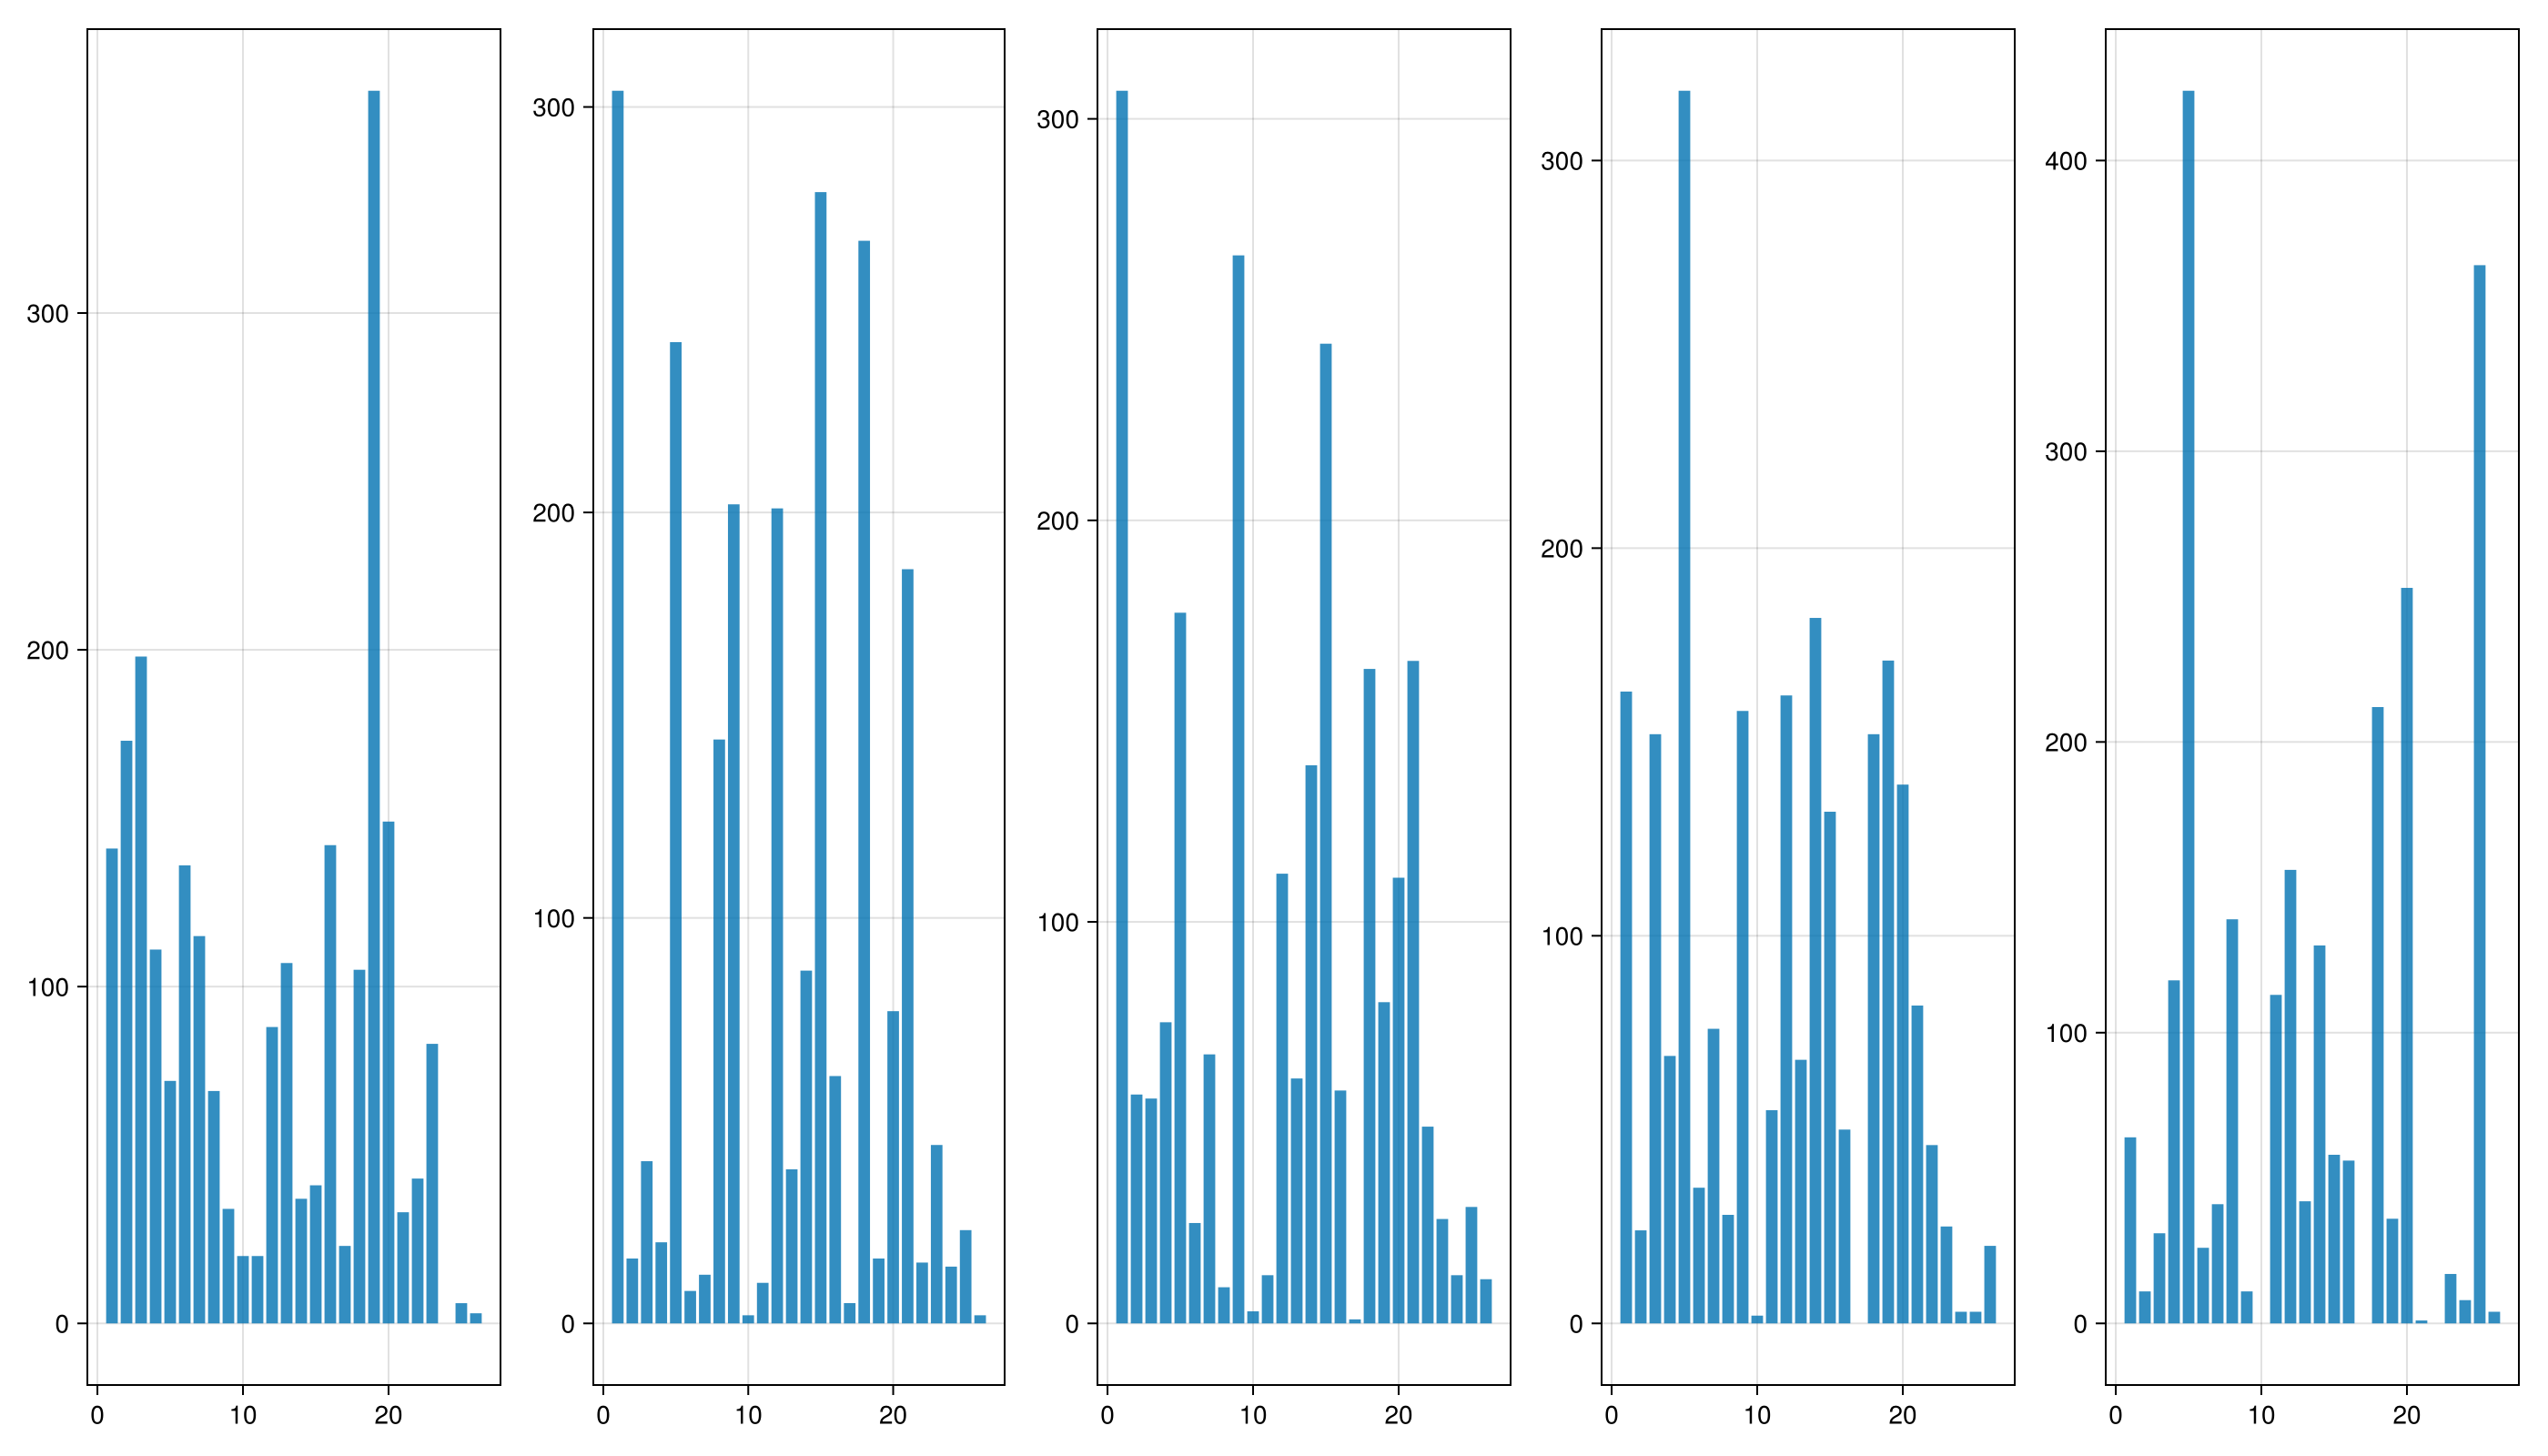

In [6]:
fig = Figure(size = (1400,800))
    ax1 = Axis(fig[1,1])
        barplot!(ax1,hist_array[:,1])
    ax2 = Axis(fig[1,2])
        barplot!(ax2,hist_array[:,2])
    ax3 = Axis(fig[1,3])
        barplot!(ax3,hist_array[:,3])
    ax4 = Axis(fig[1,4])
        barplot!(ax4,hist_array[:,4])
    ax5 = Axis(fig[1,5])
        barplot!(ax5,hist_array[:,5])
fig

### Overall letter frequency

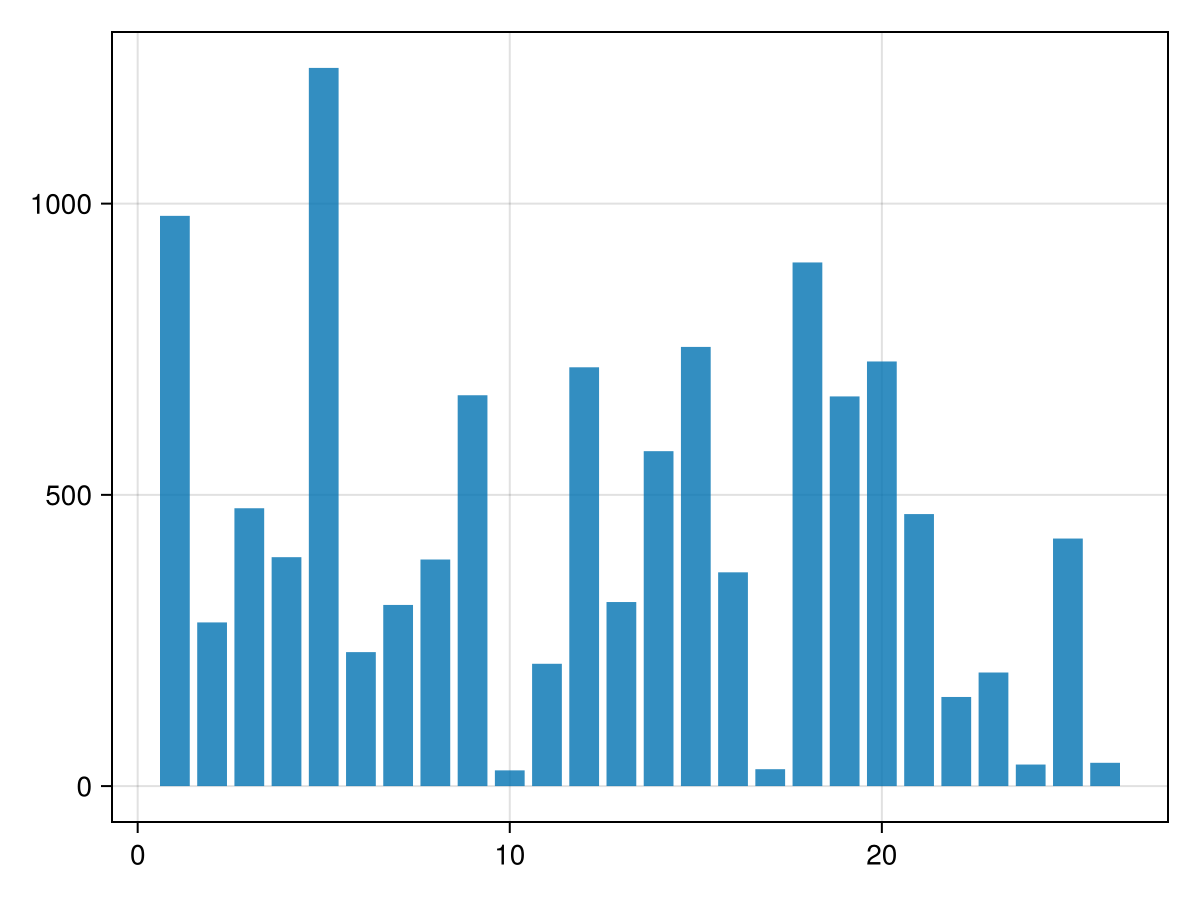

In [7]:

letters = letter_frequency(allowed_words)
p = barplot(letters)
p

## Code to filter to allowed next choice given feedback on a guess
If you make a guess (i.e. choose randomly from the list of allowed words or, if you like, from the list of allowed guesses),
you'll get feedback in the form of 

    - gray  = letter not in word
    - yellow = letter is in word, but not in current location
    - green = letter is in word and is in correct location

